In [1]:
!pip install PyAthena

In [ ]:
from pyathena import connect
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Establish connection to Athena
conn = connect(s3_staging_dir='s3://lab4data-result/', region_name='us-east-2')

# Query Athena
query = 'SELECT * FROM junzwudata.lab4data_myjunzwu'
df = pd.read_sql(query, conn)
print("Column names in the DataFrame:", df.columns)


/tmp/ipykernel_8680/929138714.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Column names in the DataFrame: Index(['timestep_time', 'vehicle_co', 'vehicle_co2', 'vehicle_hc',
       'vehicle_nox', 'vehicle_pmx', 'vehicle_angle', 'vehicle_eclass',
       'vehicle_electricity', 'vehicle_fuel', 'vehicle_id', 'vehicle_lane',
       'vehicle_noise', 'vehicle_pos', 'vehicle_route', 'vehicle_speed',
       'vehicle_type', 'vehicle_waiting', 'vehicle_x', 'vehicle_y'],
      dtype='object')


In [22]:
print(len(df))

1675


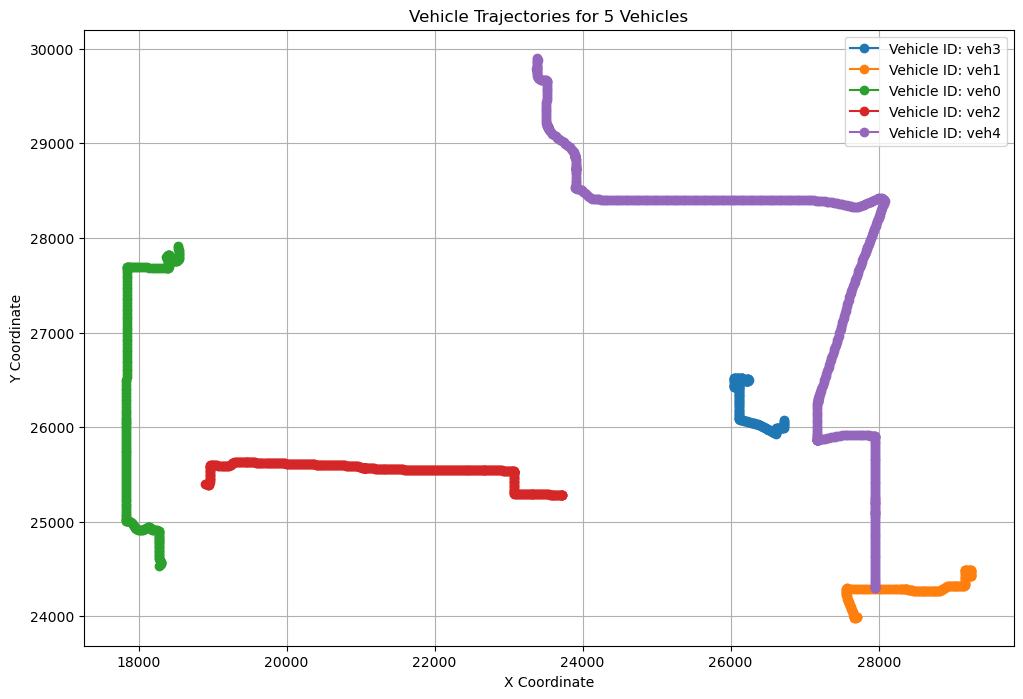

In [25]:
vehicle_ids = df["vehicle_id"].unique()[:5]

plt.figure(figsize=(12, 8))

for vehicle_id in vehicle_ids:
    vehicle_data = df[df["vehicle_id"] == vehicle_id]
    plt.plot(
        vehicle_data["vehicle_x"],
        vehicle_data["vehicle_y"],
        marker="o",
        label=f"Vehicle ID: {vehicle_id}"
    )

# Adding labels, title, legend, and grid
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Vehicle Trajectories for 5 Vehicles")
plt.legend()
plt.grid(True)
plt.show()


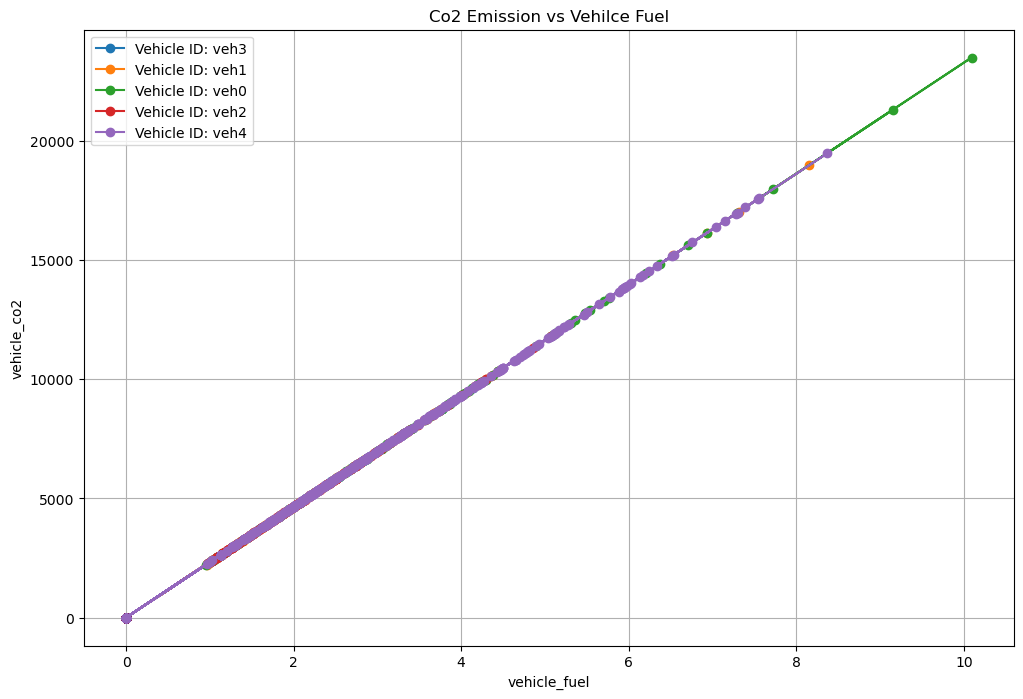

In [32]:
plt.figure(figsize=(12, 8))

for vehicle_id in vehicle_ids:
    vehicle_data = df[df["vehicle_id"] == vehicle_id]
    plt.plot(
        vehicle_data["vehicle_fuel"],
        vehicle_data["vehicle_co2"],
        marker="o",
        label=f"Vehicle ID: {vehicle_id}"
    )

# Adding labels, title, legend, and grid
plt.xlabel("vehicle_fuel")
plt.ylabel("vehicle_co2")
plt.title("Co2 Emission vs Vehilce Fuel")
plt.legend()
plt.grid(True)
plt.show()

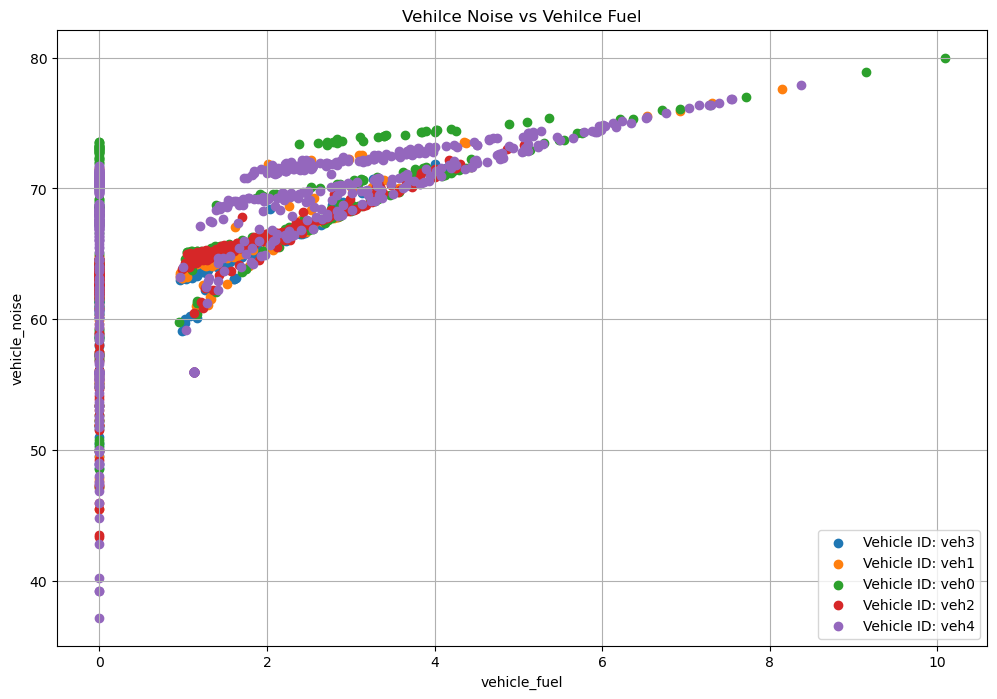

In [38]:
plt.figure(figsize=(12, 8))
# filtered_df = df[(df["vehicle_fuel"] != 0)]
for vehicle_id in vehicle_ids:
    vehicle_data = df[df["vehicle_id"] == vehicle_id]
    plt.scatter(
        vehicle_data["vehicle_fuel"],
        vehicle_data["vehicle_noise"],
        marker="o",
        label=f"Vehicle ID: {vehicle_id}"
    )

# Adding labels, title, legend, and grid
plt.xlabel("vehicle_fuel")
plt.ylabel("vehicle_noise")
plt.title("Vehilce Noise vs Vehilce Fuel")
plt.legend()
plt.grid(True)
plt.show()